## Pricing diamonds

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox

### Importing data

In [3]:
diamonds = pd.read_csv('./diamonds.csv')

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


### Exploring data

In [5]:
diamonds.price.max()

18823

In [6]:
diamonds.loc[diamonds['price']==18823]

,carat,cut,color,clarity,depth,table,price,x,y,z
25152,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


In [7]:
diamonds.groupby('color')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
D,6160.0,3164.235552,3345.747922,357.0,911.00,1828.0,4205.75,18693.0
E,8869.0,3091.383020,3358.203543,326.0,888.00,1746.0,4027.00,18731.0
F,8653.0,3722.122848,3780.755607,342.0,982.00,2340.0,4852.00,18791.0
G,10287.0,3991.018859,4039.786039,354.0,931.00,2216.0,6048.00,18818.0
H,7542.0,4477.320472,4220.518368,337.0,977.50,3437.0,5975.00,18803.0
I,4889.0,5121.677848,4731.475968,334.0,1134.00,3767.0,7256.00,18823.0
J,2540.0,5342.467323,4441.118287,335.0,1874.75,4271.5,7695.00,18710.0


In [8]:
diamonds.groupby('clarity')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
clarity,,,,,,,,
I1,658.0,3931.088146,2807.304080,345.0,2064.50,3357.5,5179.0,18531.0
IF,1613.0,2874.269684,3913.262696,449.0,895.00,1079.0,2395.0,18806.0
SI1,11832.0,4006.569726,3801.469336,326.0,1097.25,2840.5,5245.5,18818.0
SI2,8307.0,5080.820272,4278.454632,335.0,2261.50,4077.0,5824.0,18804.0
VS1,7449.0,3823.337226,3984.273410,327.0,877.00,2008.0,5967.0,18780.0
VS2,11125.0,3927.013843,4046.336346,334.0,894.00,2054.0,6037.0,18823.0
VVS1,3321.0,2522.024089,3325.028252,336.0,816.00,1096.0,2370.0,18777.0
VVS2,4635.0,3273.212082,3812.913219,336.0,799.00,1295.0,3617.0,18768.0


### Ploting data

**Para carat até ~1.5, é possível enxergar uma linearidade mais uniforme para as categorias dos aspectos de um diamante. <p> Acima de 1.5 é difícil ver um padrão.**

In [9]:
%matplotlib inline

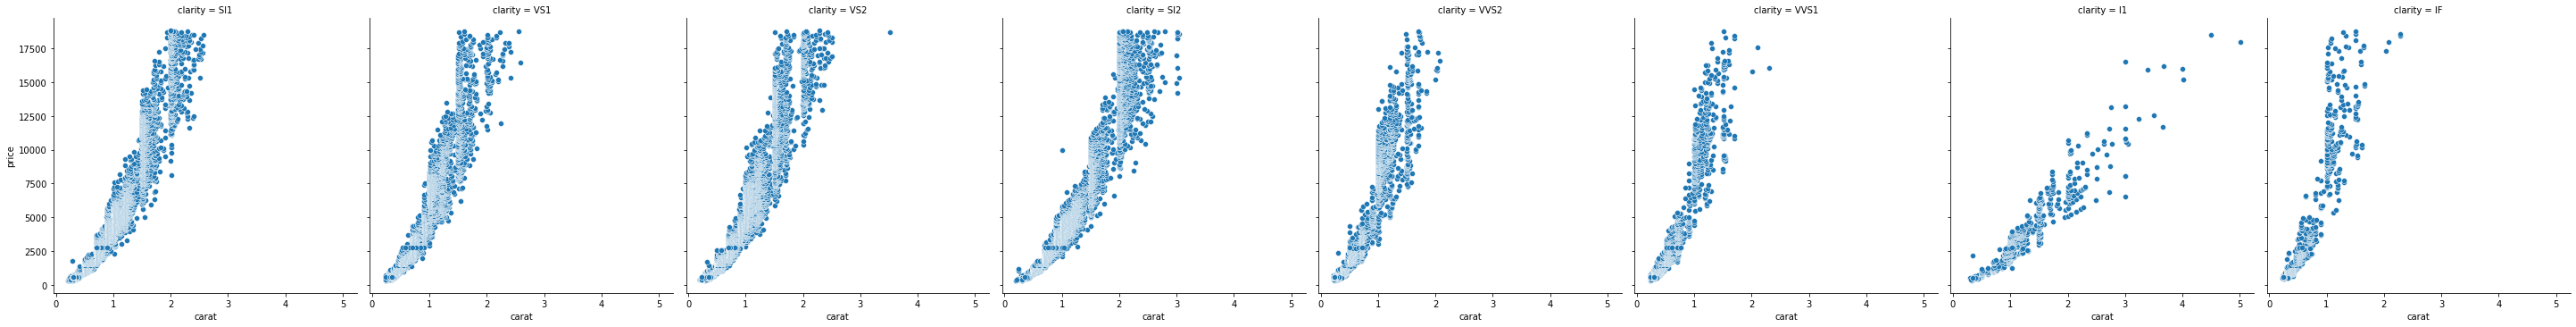

In [10]:
sns.relplot(data=diamonds, x='carat', y='price', col='clarity')

## clarity I1 tendência diferente das demais

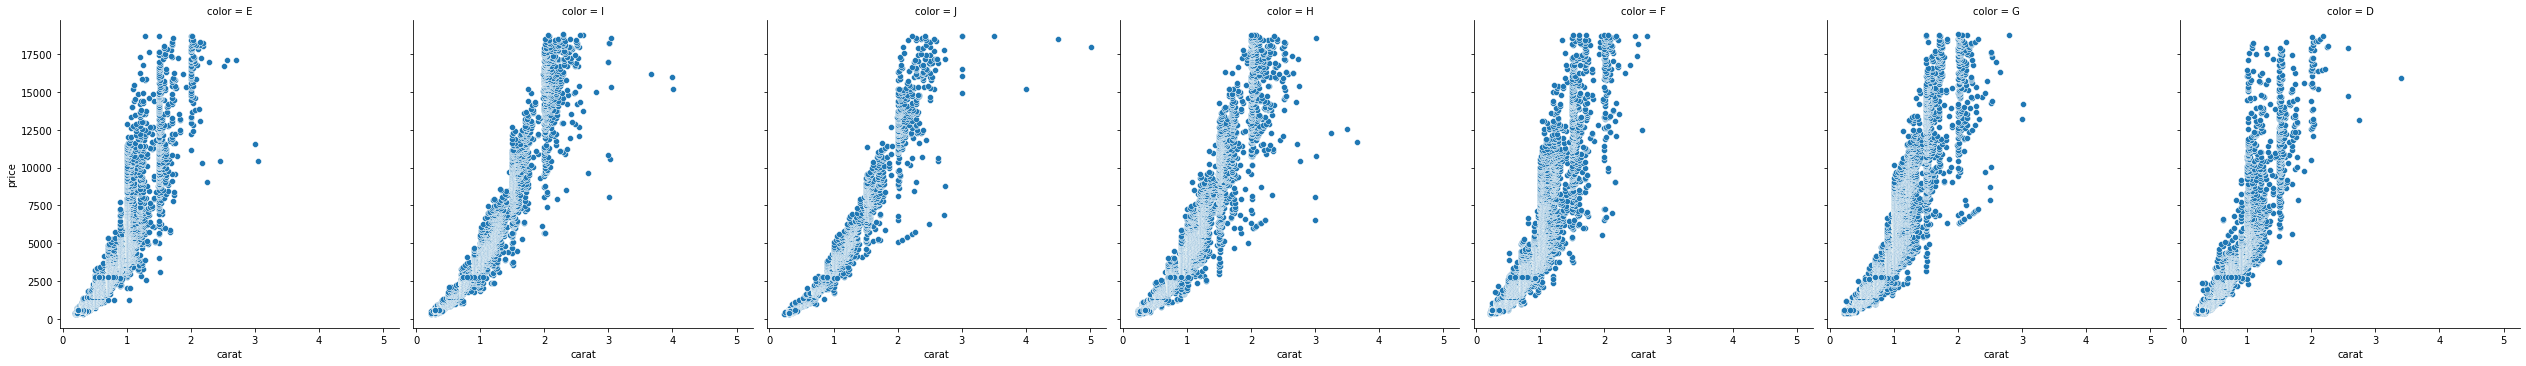

In [11]:
sns.relplot(data=diamonds, x='carat', y='price', col='color')

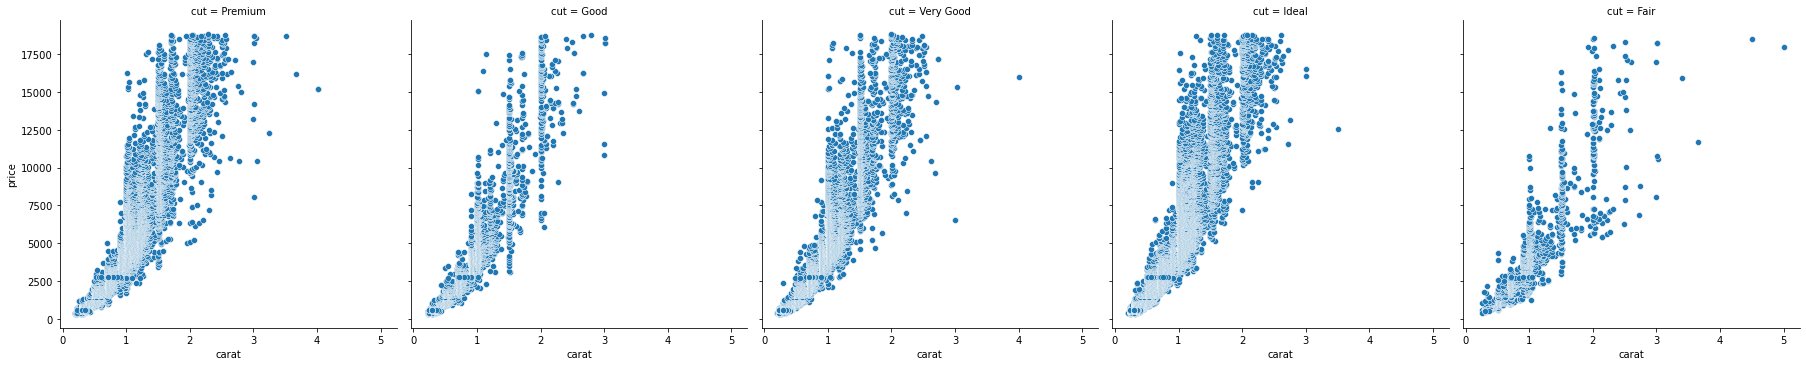

In [12]:
sns.relplot(data=diamonds, x='carat', y='price', col='cut')

## Cut = fair possui uma maior dispersão

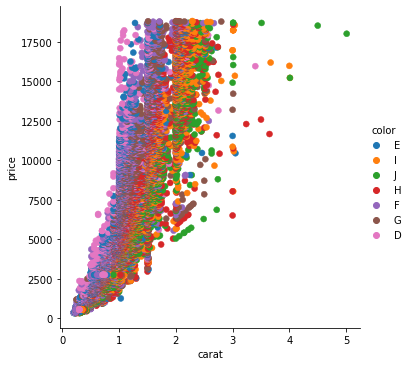

In [13]:
sns.relplot(data=diamonds, x='carat', y='price', hue='color', edgecolor=None)

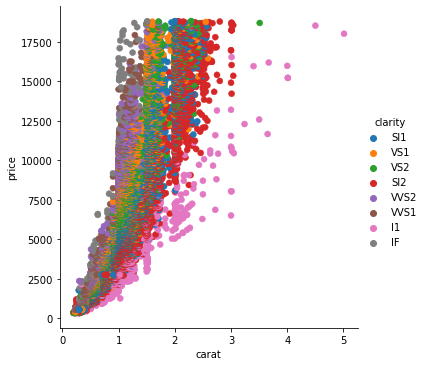

In [14]:
sns.relplot(data=diamonds, x='carat', y='price', hue='clarity', edgecolor=None)

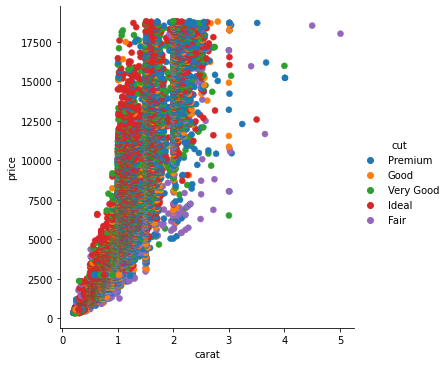

In [15]:
sns.relplot(data=diamonds, x='carat', y='price', hue='cut', edgecolor=None)

## O padrão diminui consideravelmente para carat > 1.5 para a categoria cut

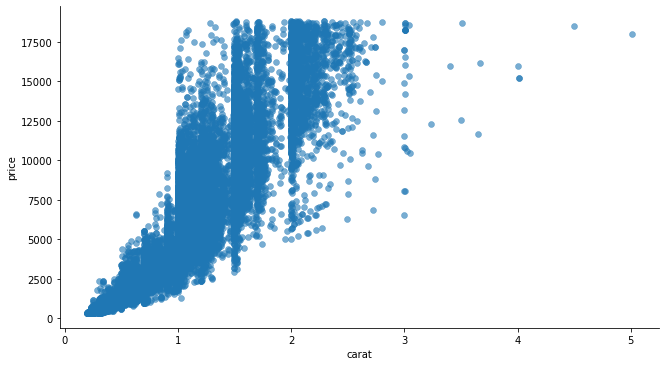

In [16]:
import matplotlib.pyplot as plt

plot = sns.relplot(data=diamonds, y='price', x='carat', edgecolor=None, alpha=0.6)
plot.fig.set_size_inches(10,5)

### Linear Regression

**Foram realizados 6 modelos de regressão, conforme a estratificação de carats como segue abaixo:** <p> 1) carat <= 0.5; <p> 2) 0.5 < carat < 1; <p> 3) 1 <= carat < 1.5; <p> 4) 1.5 <= carat < 2; <p> 5) 2 <= carat < 3; <p> 6) carat >= 3.
                   
            


In [21]:
from sklearn.metrics import mean_squared_error

In [17]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [24]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()

In [25]:
## Model 1
d = diamonds[diamonds['carat'] <= 0.5]
d1 = pd.get_dummies(d)
x1 = d1[['carat', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2','color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good']]
y1 = d1['price']

model1.fit(x1,y1)

model1.score(x1, y1)

0.8060174922139081

In [26]:
np.sqrt(mean_squared_error(y1, model1.predict(x1)))

136.44152758657106

In [27]:
## Model 2
d = diamonds[(diamonds['carat'] > 0.5) & (diamonds['carat'] < 1)]
d1 = pd.get_dummies(d)
x2 = d1[['carat', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2','color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good']]
y2 = d1['price']

model2.fit(x2,y2)

model2.score(x2, y2)

0.8873075034594882

In [28]:
np.sqrt(mean_squared_error(y2, model2.predict(x2)))

331.27245929761506

In [29]:
## Model 3
d = diamonds[(diamonds['carat'] >= 1) & (diamonds['carat'] < 1.5)]
d1 = pd.get_dummies(d)
x3 = d1[['carat', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2','color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good']]
y3 = d1['price']

model3.fit(x3,y3)

model3.score(x3, y3)

0.84815882623267

In [30]:
np.sqrt(mean_squared_error(y3, model3.predict(x3)))

844.8511397349887

In [31]:
## Model 4
d = diamonds[(diamonds['carat'] >= 1.5) & (diamonds['carat'] < 2)]
d1 = pd.get_dummies(d)
x4 = d1[['carat', 'depth', 'table', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS2']]
y4 = d1['price']
##   'color_D', 'color_E', 'color_F',
#     'color_G', 'color_H', 'color_I', 'color_J', 'depth', 'table', 'cut_Fair', 'cut_Good', 'cut_Ideal',
#    'cut_Premium', 'cut_Very Good', 'x', 'y', 'z'
model4.fit(x4,y4)

model4.score(x4, y4)

0.8144353639327936

In [32]:
np.sqrt(mean_squared_error(y4, model4.predict(x4)))

1285.0742888254942

In [33]:
## Model 5
d = diamonds[diamonds['carat'] >= 2 & (diamonds['carat'] < 3)]
d1 = pd.get_dummies(d)
x5 = d1[['carat', 'clarity_I1',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'depth', 'table', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'x', 'y', 'z']]
y5 = d1['price']

model5.fit(x5,y5)

model5.score(x5, y5)

0.9165721292637978

In [34]:
np.sqrt(mean_squared_error(y5, model5.predict(x5)))

1152.2627594153096

In [35]:
## Model 6
d = diamonds[diamonds['carat'] >= 3]
d1 = pd.get_dummies(d)
x6 = d1[['carat', 'clarity_I1',
       'clarity_SI2',
       'color_D', 'color_E',
       'color_G', 'color_H', 'color_I', 'color_J', 'depth', 'table', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'x', 'y', 'z']]
y6 = d1['price']

model6.fit(x6,y6)

model6.score(x6, y6)

0.8277200684770738

In [36]:
np.sqrt(mean_squared_error(y6, model6.predict(x6)))

1450.4726539489886

### Rick diamonds

**Importing and exploring data**

In [37]:
rick_diamonds = pd.read_csv('./rick_diamonds.csv')

In [38]:
rick_diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [39]:
rick_diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [40]:
rd = pd.get_dummies(rick_diamonds)

In [41]:
rd['pred'] = 0

In [42]:
# Model 1

rd.loc[rd.carat<=0.5, 'pred'] = model1.predict(rd[rd['carat'] <= 0.5][['carat', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2','color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good']])

In [43]:
# Model 2

rd.loc[(rd.carat > 0.5) & (rd.carat < 1), 'pred'] = model2.predict(rd[(rd.carat>0.5) & (rd.carat<1)][['carat', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2','color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good']])

In [44]:
# Model 3

rd.loc[(rd.carat >= 1) & (rd.carat < 1.5), 'pred'] = model3.predict(rd[(rd.carat >= 1) & (rd.carat < 1.5)][['carat', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2','color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good']])

In [45]:
# Model 4

rd.loc[(rd.carat >= 1.5) & (rd.carat < 2), 'pred'] = model4.predict(rd[(rd.carat >= 1.5) & (rd.carat < 2)][['carat', 'depth', 'table', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS2']])

In [46]:
# Model 5

rd.loc[(rd.carat >= 2) & (rd.carat < 3), 'pred'] = model5.predict(rd[(rd.carat >= 2) & (rd.carat < 3)][['carat', 'clarity_I1',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'depth', 'table', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'x', 'y', 'z']])

In [47]:
# Model 6

rd.loc[rd.carat >= 3, 'pred'] = model6.predict(rd[rd['carat'] >= 3][['carat', 'clarity_I1',
       'clarity_SI2',
       'color_D', 'color_E',
       'color_G', 'color_H', 'color_I', 'color_J', 'depth', 'table', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'x', 'y', 'z']])

In [48]:
rd.rename(columns={'pred':'price_predicted'}, inplace=True)

In [49]:
rd1 = rd

In [50]:
color = rick_diamonds.color
clarity = rick_diamonds.clarity
cut = rick_diamonds.cut 

In [51]:
rd1['color'] = color
rd1['clarity'] = clarity
rd1['cut'] = cut

In [52]:
rd1.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price_predicted',
       'color', 'clarity', 'cut'],
      dtype='object')